In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## USA housing data
from google.colab import files
uploaded = files.upload()

Saving USA_Housing_3rdLAb.csv to USA_Housing_3rdLAb.csv


In [ ]:
# make a data frame using pd.read_csv
housing_data = pd.read_csv('USA_Housing_3rdLAb.csv')
housing_data.head()
# plot first five rows to take a quick look on the data and check for nulls using dataframe.info()
# housing_data.info()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# Drop unnecessary column (address column) using dataframe.drop and plot first five rows to confirm
housing_data.drop(['Address'],axis=1,inplace=True)
housing_data.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
# put avg area income column values in x and price column values in y 
X = housing_data['Avg. Area Income'].values/1000
y = housing_data['Price'].values/1000


In [ ]:
# import Libraries 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [ ]:
# put avg area income column values in X and price column values in Y 
X = housing_data['Avg. Area Income'].values
y = housing_data['Price'].values
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0);
print(X_train)
print(X_train.reshape(-1,1))
print(type(X))


[80196.24225089 74130.60632358 67384.00037347 ... 67094.19707241
 52541.31984657 86762.88286361]
[[80196.24225089]
 [74130.60632358]
 [67384.00037347]
 ...
 [67094.19707241]
 [52541.31984657]
 [86762.88286361]]
<class 'numpy.ndarray'>


In [ ]:
# create Linear Regression object and Train the data model using object.fit method 
hypothesis = LinearRegression()
hypothesis.fit(X_train.reshape(-1,1),y_train)
#displaying the theta1 and theta0
print(hypothesis.intercept_)
print(hypothesis.coef_)

-224617.80109277763
[21.24368249]


In [ ]:
# make the best hypothesis for given training data samples using object.predict method
X_train_pridict = hypothesis.predict(X_train.reshape(-1,1))
print(X_train_pridict)


[1479045.7059688  1350189.26224477 1206866.50757303 ... 1200710.01826151
  891553.31519742 1618545.33415435]


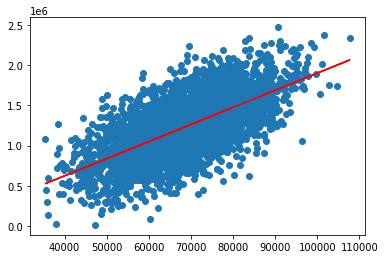

In [ ]:
# plot the training data samples using scatter plot and hypothesis for training input data using plot 
import matplotlib.pyplot as plt
plt.scatter(X_train.reshape(-1,1),y_train.reshape(-1,1))
plt.plot(X_train.reshape(-1,1),X_train_pridict,color='r')
plt.show()

In [ ]:
# Predict the hypothesis for given test data samples using hypothesis.predict
X_test_predict = hypothesis.predict(X_test.reshape(-1,1))

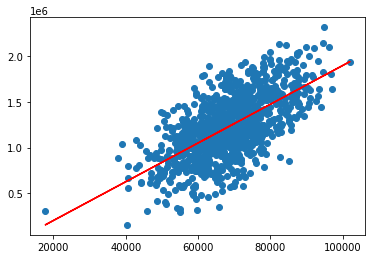

In [ ]:
# plot the test data samples using scatter plot and hypothesis for testing input data using plot 
plt.scatter(X_test.reshape(-1,1),y_test.reshape(-1,1))
plt.plot(X_test.reshape(-1,1),X_test_predict,color='r')
plt.show()

In [ ]:
# print MAE, MSE and RMSE
MAE = metrics.mean_absolute_error(y_test, X_test_predict, sample_weight=None, multioutput='uniform_average')
print(MAE)
MSE = metrics.mean_squared_error(y_test, X_test_predict, sample_weight=None, multioutput='uniform_average')
print(MSE)
from math import sqrt
RMSE = sqrt(MSE)
print(RMSE)



219728.33602368197
74084394125.46416
272184.4854606231
